 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns
whale_returns = Path("../Starter_Code/Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns, parse_dates=True, index_col='Date', infer_datetime_format=True)
whale_returns_df.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_returns_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns = Path("../Starter_Code/Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns, parse_dates=True, index_col='Date', infer_datetime_format=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns_df.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_history = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history, parse_dates=True, index_col='Date', infer_datetime_format=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head()                     

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"]
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")
sp500_history_df
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [13]:
sp500_history_df.dtypes

Close    float64
dtype: object

In [14]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df["Close"].pct_change()
sp500_daily_returns.head()


Date
2012-10-01         NaN
2012-10-02    0.000872
2012-10-03    0.003624
2012-10-04    0.007174
2012-10-05   -0.000322
Name: Close, dtype: float64

In [15]:
# Drop nulls
sp500_history_df.dropna()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df = sp500_history_df.rename(columns={
    "Close": "Sp_500_Close",
    })

sp500_history_df.head()

,Sp_500_Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [17]:
sp500_history_Close_Price = sp500_history_df
sp500_history_Close_Price.head()

,Sp_500_Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [18]:
sp500_history_Close_Price.dropna(inplace = True)
sp500_history_Close_Price.head()

,Sp_500_Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data_columns = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis="columns", join="inner")
joined_data_columns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

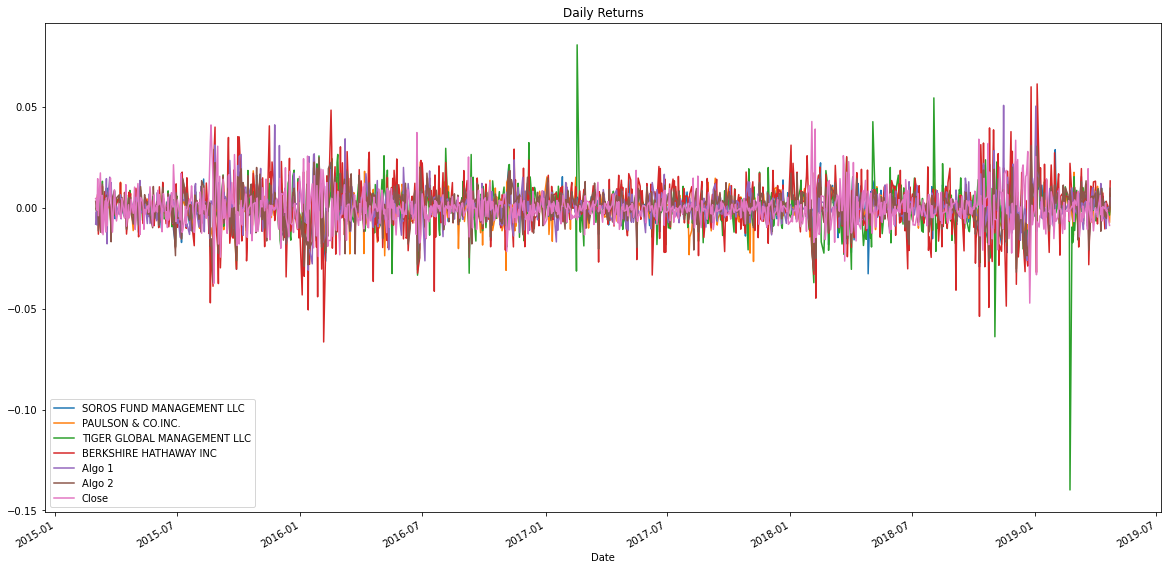

In [18]:
# Plot daily returns of all portfolios
joined_data_columns.plot(figsize=(20,10),title = "Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

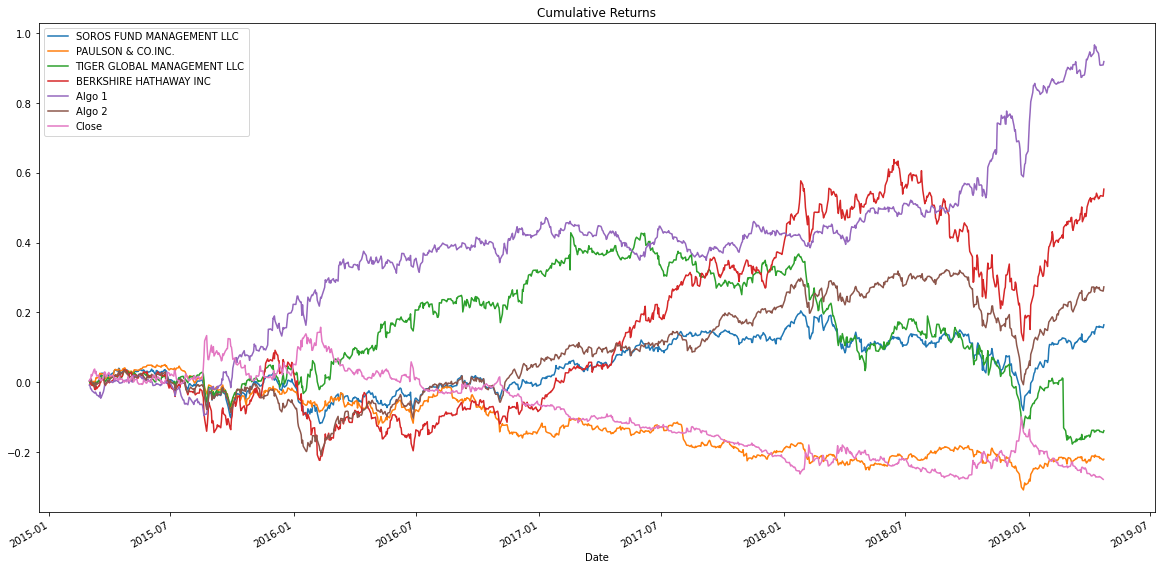

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data_columns).cumprod()-1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10),title = "Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk'}>

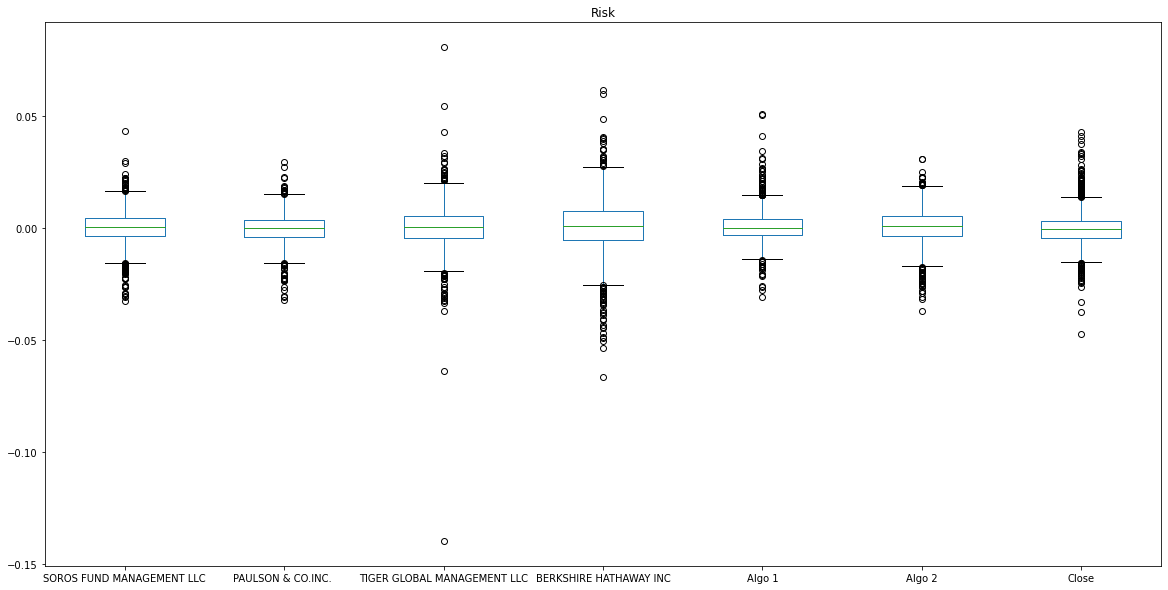

In [20]:
# Box plot to visually show risk
joined_data_columns.plot.box(figsize=(20,10),title = "Risk")

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_data_columns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007621
Algo 2                         0.008339
Close                          0.008584
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
print(joined_data_columns["Close"].std())
sp_500_STD = daily_std["Close"]
# Determine which portfolios are riskier than the S&P 500
daily_std[daily_std > sp_500_STD]

0.008584076593970714


TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
daily_std = daily_std * np.sqrt(252)
daily_std
 


SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120987
Algo 2                         0.132374
Close                          0.136268
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21_Day_Rolling_STD'}, xlabel='Date'>

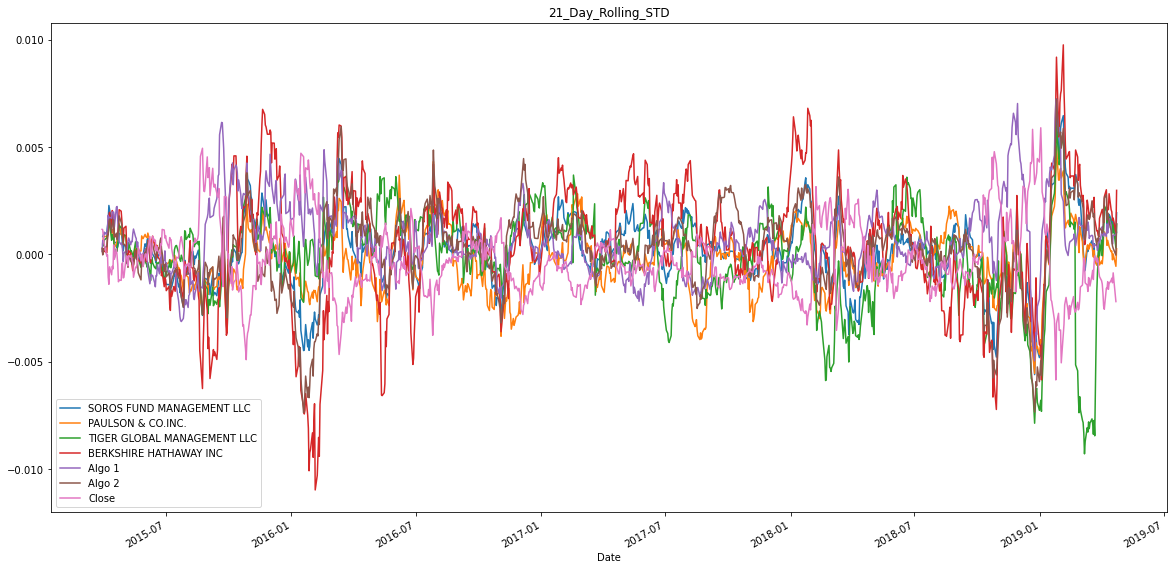

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_data_columns.rolling(window=21).mean()

# Plot the rolling standard deviation
joined_data_columns.rolling(window=21).mean().plot(figsize=(20,10),title = "21_Day_Rolling_STD")

### Calculate and plot the correlation

<AxesSubplot:>

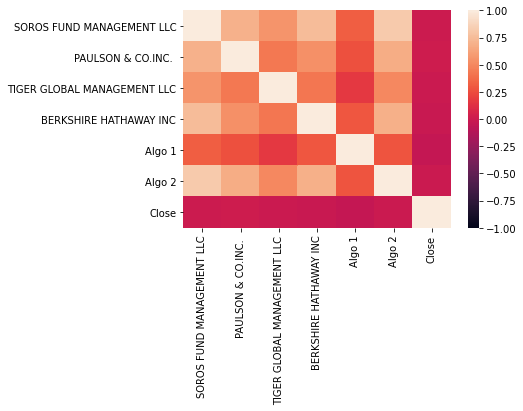

In [25]:
# Calculate the correlation
correlation = joined_data_columns.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

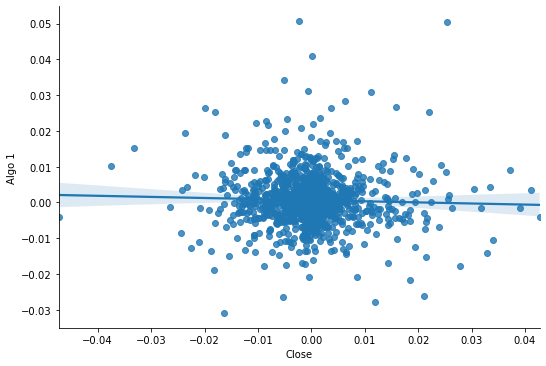

In [26]:
# Calculate covariance of a single portfolio
covariance = algo_returns_df['Algo 1'].cov(sp500_daily_returns)
covariance
# Calculate variance of S&P 500
variance = sp500_daily_returns.var()
variance
# Computing beta
Beta = covariance / variance
Beta
# Plot beta trend
sns.lmplot(x='Close', y='Algo 1', data=joined_data_columns, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [27]:
# Use `ewm` to calculate the rolling window
sp500_daily_returns.ewm(halflife=21)


ExponentialMovingWindow [com=29.799346392775035,min_periods=1,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
volatility = joined_data_columns.std() * np.sqrt(252)
risk_free = 0
sharpe_ratio = (joined_data_columns.mean() - risk_free) / volatility

<AxesSubplot:>

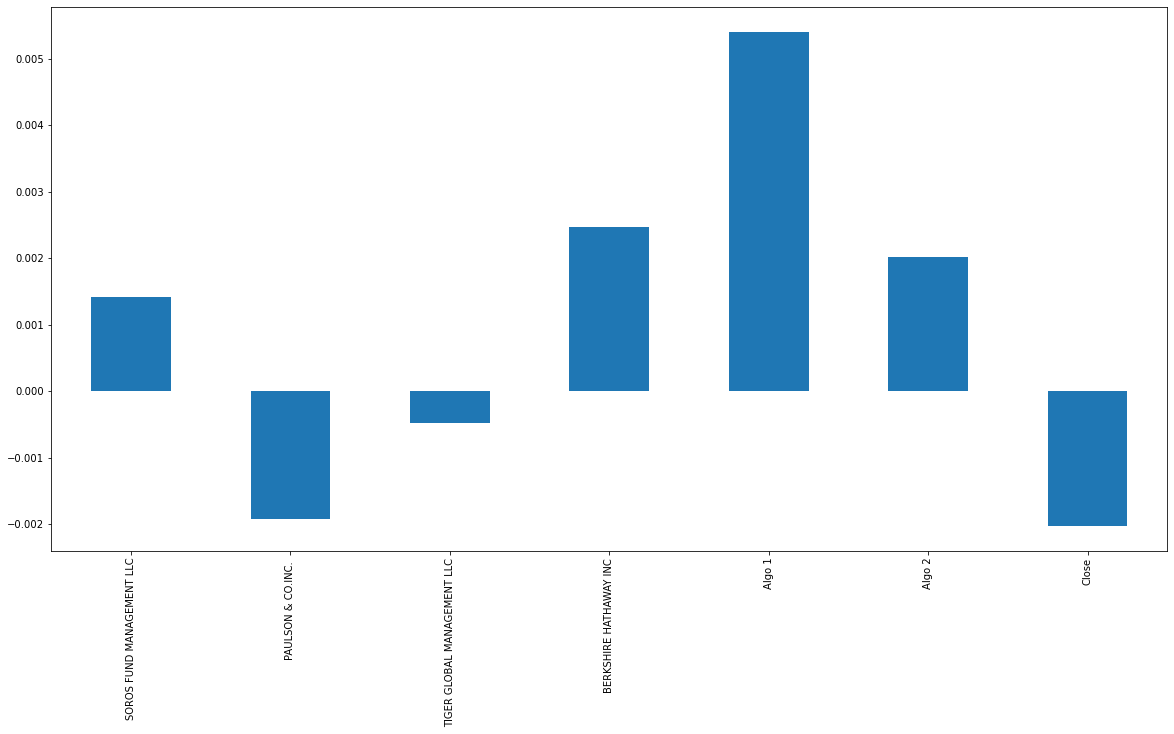

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(figsize=(20,10))

## Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

### Write your answer here! Algo 1 was the strongest performer in both outright returns and risk on a risk adjusted basis. Algo 2 beat the S&P 500 and 3 out of 4 whale portfolios. Of the whale portfolios only Berkshire Hathaway performed better than Algo 2 in terms of returns. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [33]:
# Reading data from 1st stock
Vince_returns = Path("../Starter_Code/Resources/Vince_portfolio.csv")
Vince_returns_df = pd.read_csv(Vince_returns, parse_dates=True, index_col='Date', infer_datetime_format=True)
Vince_returns_df.head()


,Close,Date.1,Close.1,Date.2,Close.2
Date,,,,,
2015-08-03 16:00:00,664.72,8/3/2015 16:00,52.00,8/3/2015 16:00,27.74
2015-08-04 16:00:00,661.28,8/4/2015 16:00,53.26,8/4/2015 16:00,25.80
2015-08-05 16:00:00,673.29,8/5/2015 16:00,54.03,8/5/2015 16:00,25.24
2015-08-06 16:00:00,670.15,8/6/2015 16:00,49.23,8/6/2015 16:00,26.95
2015-08-07 16:00:00,664.39,8/7/2015 16:00,48.50,8/7/2015 16:00,26.50


In [34]:
Vince_returns_df.columns


Index(['Close', 'Date.1', 'Close.1', 'Date.2', 'Close.2'], dtype='object')

In [35]:
columns = ["GOOGL_Close", "DATE1", "TSLA_Close", "DATE2", "Z_Close"]
Vince_returns_df.columns = columns
Vince_returns_df.head()


,GOOGL_Close,DATE1,TSLA_Close,DATE2,Z_Close
Date,,,,,
2015-08-03 16:00:00,664.72,8/3/2015 16:00,52.00,8/3/2015 16:00,27.74
2015-08-04 16:00:00,661.28,8/4/2015 16:00,53.26,8/4/2015 16:00,25.80
2015-08-05 16:00:00,673.29,8/5/2015 16:00,54.03,8/5/2015 16:00,25.24
2015-08-06 16:00:00,670.15,8/6/2015 16:00,49.23,8/6/2015 16:00,26.95
2015-08-07 16:00:00,664.39,8/7/2015 16:00,48.50,8/7/2015 16:00,26.50


In [36]:
Vince_returns_df = Vince_returns_df.drop(columns=["DATE1", "DATE2"])
Vince_returns_df.head()

,GOOGL_Close,TSLA_Close,Z_Close
Date,,,
2015-08-03 16:00:00,664.72,52.00,27.74
2015-08-04 16:00:00,661.28,53.26,25.80
2015-08-05 16:00:00,673.29,54.03,25.24
2015-08-06 16:00:00,670.15,49.23,26.95
2015-08-07 16:00:00,664.39,48.50,26.50


In [37]:
# Reading data from 2nd stock
Vince_returns_df.dtypes
type(Vince_returns_df.index)


pandas.core.indexes.datetimes.DatetimeIndex

In [38]:
Vince_returns_df.index = Vince_returns_df.index.normalize()
Vince_returns_df.head()

,GOOGL_Close,TSLA_Close,Z_Close
Date,,,
2015-08-03,664.72,52.00,27.74
2015-08-04,661.28,53.26,25.80
2015-08-05,673.29,54.03,25.24
2015-08-06,670.15,49.23,26.95
2015-08-07,664.39,48.50,26.50


In [39]:
# Reading data from 3rd stock


In [354]:
# Combine all stocks in a single DataFrame


In [355]:
# Reset Date index


In [40]:
# Reorganize portfolio data by having a column per symbol


In [41]:
# Calculate daily returns
all_returns = Vince_returns_df.pct_change()
all_returns.head()
# Drop NAs
all_returns.dropna()
# Display sample data
all_returns.tail()

,GOOGL_Close,TSLA_Close,Z_Close
Date,,,
2019-04-15,0.003108,-0.004856,0.001336
2019-04-16,0.004386,0.026089,0.018682
2019-04-17,0.006681,-0.007682,-0.031176
2019-04-18,0.001072,0.007373,-0.018929
2019-04-22,0.009900,-0.038426,-0.037486


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [43]:
# Set weights
googl_weight = 1/3
tsla_weight = 1/3
z_weight = 1/3
portfolio_returns = googl_weight * all_returns["GOOGL_Close"] + tsla_weight * all_returns["TSLA_Close"] + z_weight * all_returns["Z_Close"]
portfolio_returns.head()
# Calculate portfolio return

# Display sample data


Date
2015-08-03         NaN
2015-08-04   -0.016960
2015-08-05    0.003638
2015-08-06   -0.008585
2015-08-07   -0.013374
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [44]:
# Join your returns DataFrame to the original returns DataFrame
joined_vince_portfolio = pd.concat([joined_data_columns, portfolio_returns ], axis="columns", join="inner")
joined_vince_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close,0
Date,,,,,,,,
2015-08-03,-0.004603,-0.001984,0.001360,-0.000036,-0.009612,-0.005728,0.002255,NaN
2015-08-04,0.001342,-0.010218,0.000684,-0.003354,-0.002920,-0.000284,-0.003105,-0.016960
2015-08-05,0.004219,-0.003760,0.001800,0.004377,-0.003709,0.001363,0.007814,0.003638
2015-08-06,0.000446,-0.003822,-0.005836,-0.002838,0.010592,-0.012011,0.002883,-0.008585
2015-08-07,-0.005018,0.002053,-0.001415,-0.007747,-0.000374,0.013425,-0.012646,-0.013374
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000137
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.016386
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.010726


In [45]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_vince_portfolio.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close,0
Date,,,,,,,,
2015-08-04,0.001342,-0.010218,0.000684,-0.003354,-0.002920,-0.000284,-0.003105,-0.016960
2015-08-05,0.004219,-0.003760,0.001800,0.004377,-0.003709,0.001363,0.007814,0.003638
2015-08-06,0.000446,-0.003822,-0.005836,-0.002838,0.010592,-0.012011,0.002883,-0.008585
2015-08-07,-0.005018,0.002053,-0.001415,-0.007747,-0.000374,0.013425,-0.012646,-0.013374
2015-08-10,0.014226,0.010811,0.008946,0.005263,0.007062,0.010774,0.009649,-0.007011
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000137
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.016386
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.010726


In [46]:
joined_vince_portfolio = joined_vince_portfolio.rename(columns={
    0: "Vince"
    })

joined_vince_portfolio.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close,Vince
Date,,,,,,,,
2015-08-03,-0.004603,-0.001984,0.001360,-0.000036,-0.009612,-0.005728,0.002255,NaN
2015-08-04,0.001342,-0.010218,0.000684,-0.003354,-0.002920,-0.000284,-0.003105,-0.016960
2015-08-05,0.004219,-0.003760,0.001800,0.004377,-0.003709,0.001363,0.007814,0.003638
2015-08-06,0.000446,-0.003822,-0.005836,-0.002838,0.010592,-0.012011,0.002883,-0.008585
2015-08-07,-0.005018,0.002053,-0.001415,-0.007747,-0.000374,0.013425,-0.012646,-0.013374


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [47]:
# Calculate the annualized `std`
all_daily_std = joined_vince_portfolio.std()
all_daily_std


SOROS FUND MANAGEMENT LLC      0.008107
PAULSON & CO.INC.              0.007296
TIGER GLOBAL MANAGEMENT LLC    0.011335
BERKSHIRE HATHAWAY INC         0.013408
Algo 1                         0.007761
Algo 2                         0.008539
Close                          0.008737
Vince                          0.016583
dtype: float64

In [48]:
ann_daily_std = all_daily_std * np.sqrt(252)
ann_daily_std

SOROS FUND MANAGEMENT LLC      0.128696
PAULSON & CO.INC.              0.115826
TIGER GLOBAL MANAGEMENT LLC    0.179941
BERKSHIRE HATHAWAY INC         0.212841
Algo 1                         0.123196
Algo 2                         0.135555
Close                          0.138702
Vince                          0.263246
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21_Day_Rolling_STD'}, xlabel='Date'>

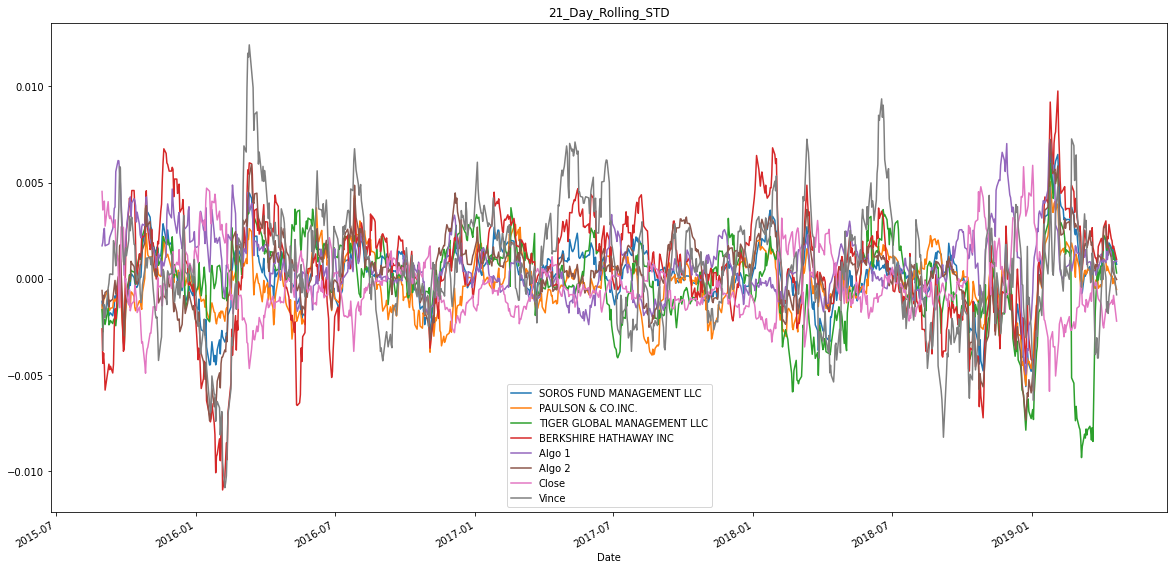

In [49]:
# Calculate rolling standard deviation
joined_vince_portfolio.rolling(window=21).mean()
# Plot rolling standard deviation
joined_vince_portfolio.rolling(window=21).mean().plot(figsize=(20,10),title = "21_Day_Rolling_STD")

### Calculate and plot the correlation

In [50]:
# Calculate and plot the correlation
correlation_vince = joined_vince_portfolio.corr()
correlation_vince


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close,Vince
SOROS FUND MANAGEMENT LLC,1.000000,0.699023,0.552412,0.754124,0.318805,0.826896,0.001956,0.573096
PAULSON & CO.INC.,0.699023,1.000000,0.426138,0.542567,0.273548,0.679249,0.012913,0.423354
TIGER GLOBAL MANAGEMENT LLC,0.552412,0.426138,1.000000,0.415224,0.163643,0.494153,-0.008679,0.298296
BERKSHIRE HATHAWAY INC,0.754124,0.542567,0.415224,1.000000,0.295227,0.684389,-0.013049,0.619929
Algo 1,0.318805,0.273548,0.163643,0.295227,1.000000,0.295567,-0.034342,0.198658
Algo 2,0.826896,0.679249,0.494153,0.684389,0.295567,1.000000,-0.006995,0.556282
Close,0.001956,0.012913,-0.008679,-0.013049,-0.034342,-0.006995,1.000000,-0.000674
Vince,0.573096,0.423354,0.298296,0.619929,0.198658,0.556282,-0.000674,1.000000


<AxesSubplot:>

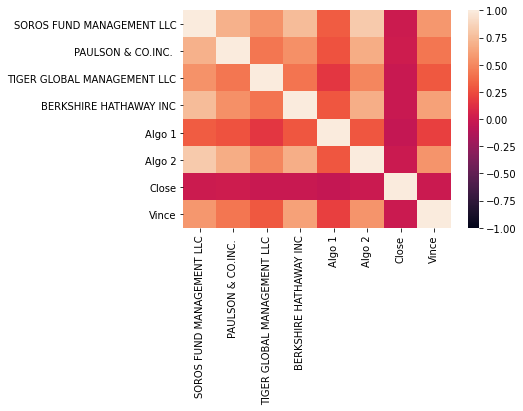

In [51]:
sns.heatmap(correlation_vince, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [53]:
# Calculate and plot Beta
covariance_vince = joined_vince_portfolio['Vince'].cov(sp500_daily_returns)
covariance_vince

-9.772192356139461e-08

In [54]:
Beta_vince = covariance_vince / variance
Beta_vince

-0.0014767774483993232

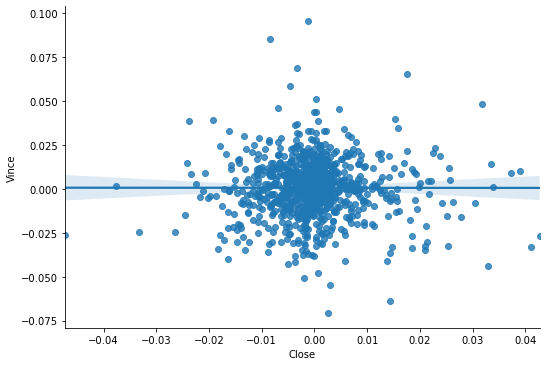

In [55]:
sns.lmplot(x='Close', y='Vince', data=joined_vince_portfolio, aspect=1.5, fit_reg=True)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [56]:
# Calculate Annualzied Sharpe Ratios
volatility_vince = joined_vince_portfolio.std() * np.sqrt(252)
risk_free = 0
sharpe_ratio_vince = (joined_vince_portfolio.mean() - risk_free) / volatility_vince

<AxesSubplot:>

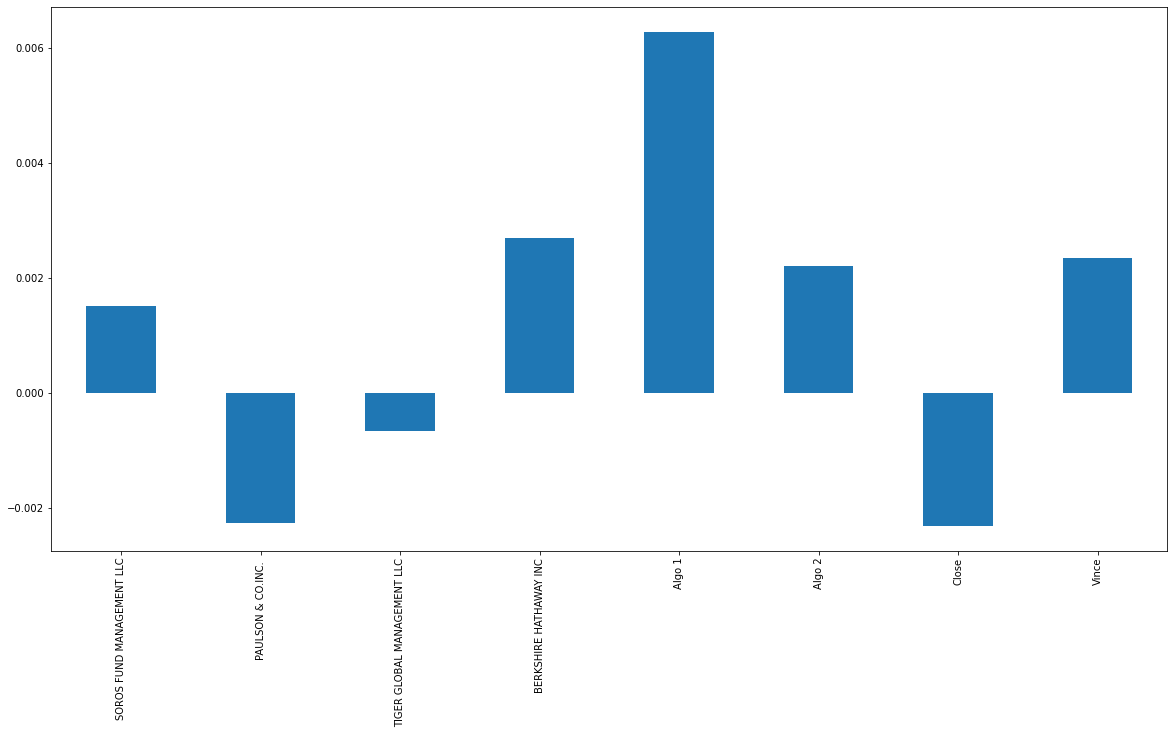

In [57]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_vince.plot.bar(figsize=(20,10))

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

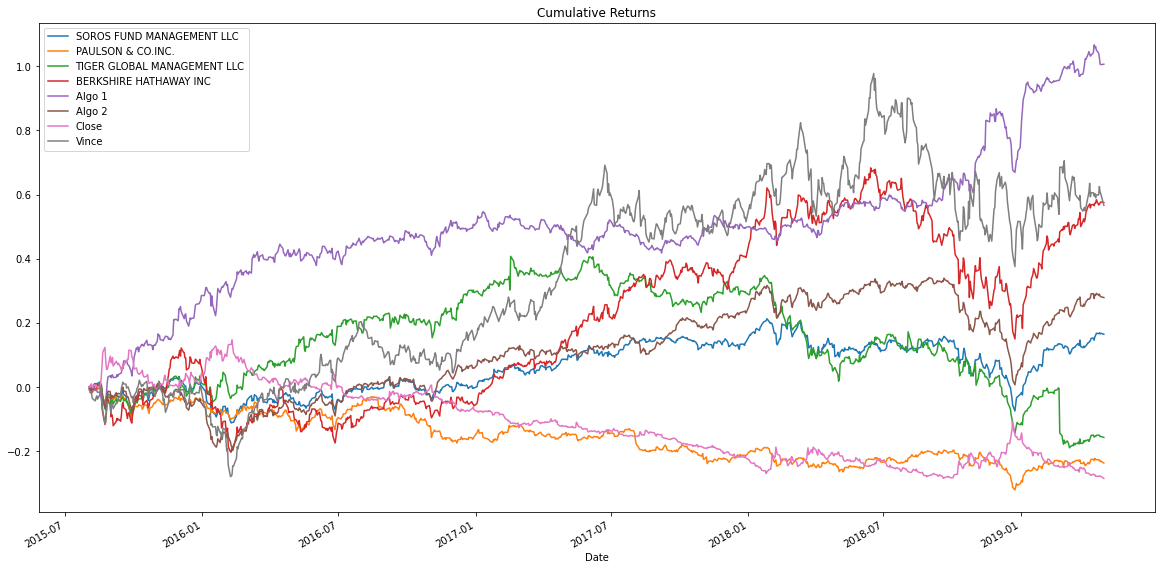

In [58]:
# Calculate cumulative returns of all portfolios
cumulative_returns_vince = (1 + joined_vince_portfolio).cumprod()-1
# Plot cumulative returns
cumulative_returns_vince.plot(figsize=(20,10),title = "Cumulative Returns")

### How does your portfolio do?

Write your answer here!

## The Vince portfolio finished third behind Algo1 and Berkshire Hathaway in both outright returns and on a risk adjusted basis.

pwd

In [66]:
pwd

'C:\\users\\vince\\desktop\\jupyter\\nu-chi-virt-fin-pt-04-2021-u-c\\nu-chi-virt-fin-pt-04-2021-u-c\\03-Python-Pandas\\Homework\\Instructions\\Starter_Code'